<Figure size 640x480 with 0 Axes>

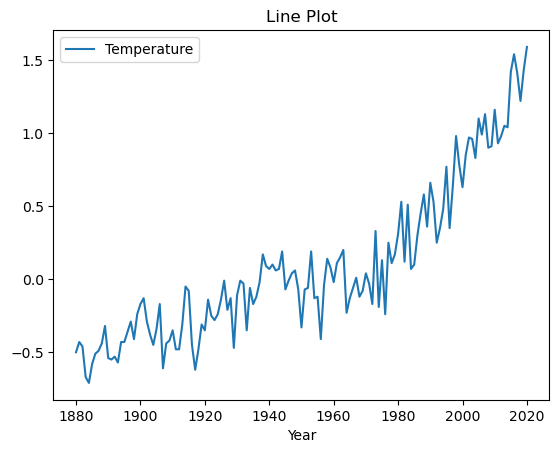

<Figure size 640x480 with 0 Axes>

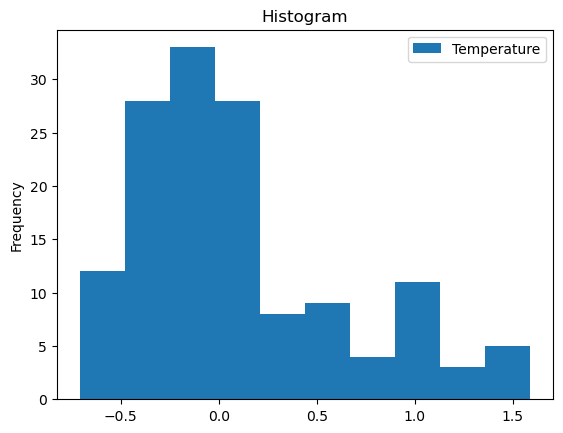

<Figure size 640x480 with 0 Axes>

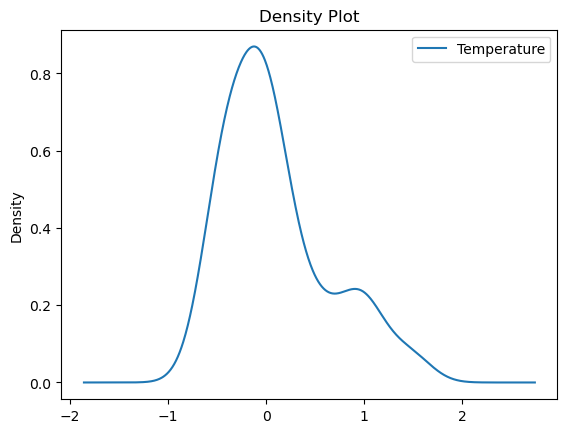

<Figure size 640x480 with 0 Axes>

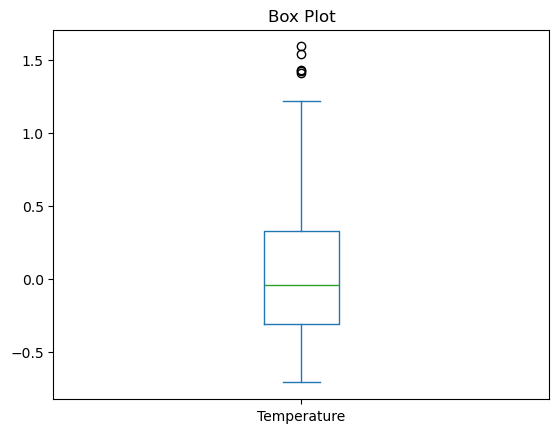

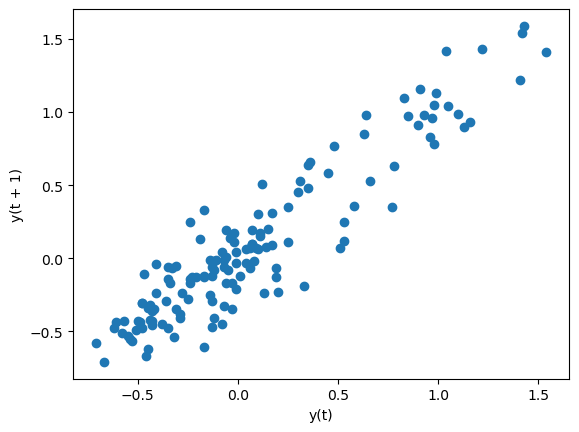

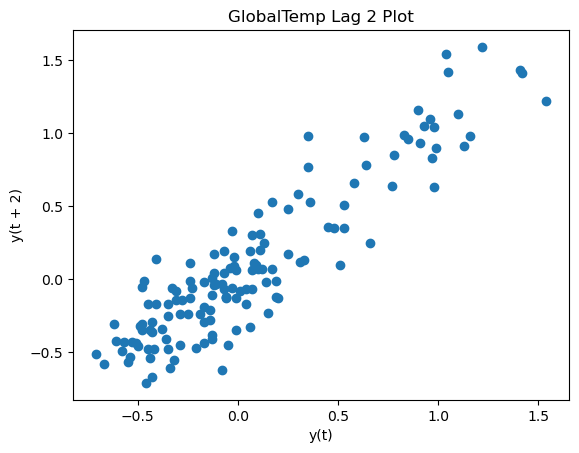

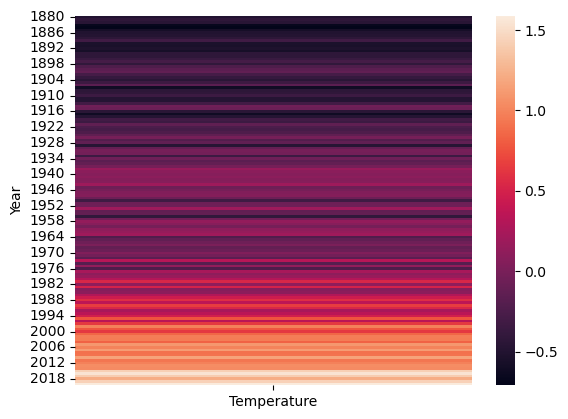

In [23]:
#3.3.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

def generate_plots(plot_filename_base, series):
    
    # Line plot
    plt.figure()
    series.plot.line(title="Line Plot")
    plt.savefig(f'plots/{plot_filename_base}_line.png')

    # Histogram
    plt.figure()
    series.plot.hist(title="Histogram")
    plt.savefig(f'plots/{plot_filename_base}_hist.png')

    # Density plot
    plt.figure()
    series.plot.density(title="Density Plot")
    plt.savefig(f'plots/{plot_filename_base}_density.png')

    # Box plot
    plt.figure()
    series.plot.box(title="Box Plot")
    plt.savefig(f'plots/{plot_filename_base}_box.png')

    # Lag-1 plot
    plt.figure()
    pd.plotting.lag_plot(series, lag=1)
    plt.savefig(f'plots/{plot_filename_base}_lag1.png')

    # Lag-2 plot
    plt.figure()
    plt.title("GlobalTemp Lag 2 Plot")
    pd.plotting.lag_plot(series, lag=2)
    plt.savefig(f'plots/{plot_filename_base}_lag2.png')

    # HeatMap
    plt.figure()
    sns.heatmap(series)
    plt.savefig(f'plots/{plot_filename_base}_heatmap.png')

    return

#3.2.2
# Load the CSV file into a DataFrame
df = pd.read_excel("global-land-temperature-anomalies-1880-2020.xlsx", 'Data')
series= df.iloc[4:145, 1:3]
series = series.bfill()
series.columns = ['Year', 'Temperature']
#series['Year'] = pd.to_datetime(series['Year'])
series['Year'] = pd.to_numeric(series['Year'])
series.set_index('Year', inplace=True)

generate_plots("Temp Anomaly", series)
    

Original p_value =  0.9935702498622588
Diff 1 p_value =  1.460486937213061e-22


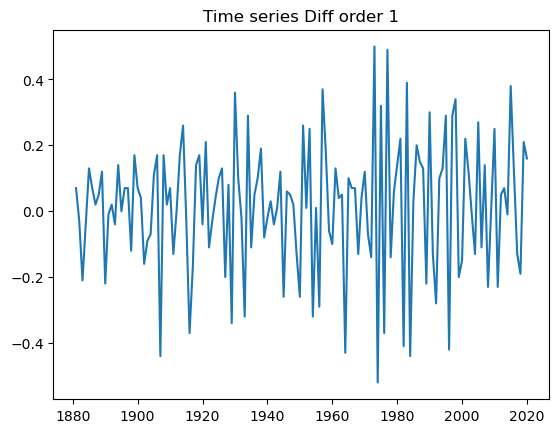

In [29]:
from statsmodels.tsa.stattools import adfuller

# ADF test to check if data is stationary
# p should be < 0.05 is stationary
result_adf = adfuller(series, autolag='AIC')
p_value = result_adf[1]
print("Original p_value = ", p_value)

#Linear trend detected. order-1 differencing applied to remove trend
series_diff = series.diff().dropna()

# Plot data for visual inspection
plt.figure()
plt.savefig('plots/TempAnomaly_Diff1.png')
plt.title("Time series Diff order 1")
plt.plot(series_diff)

# ADF test to check if data is stationary
# p should be < 0.05 is stationary
result_adf = adfuller(series_diff, autolag='AIC')
p_value = result_adf[1]
print("Diff 1 p_value = ", p_value)

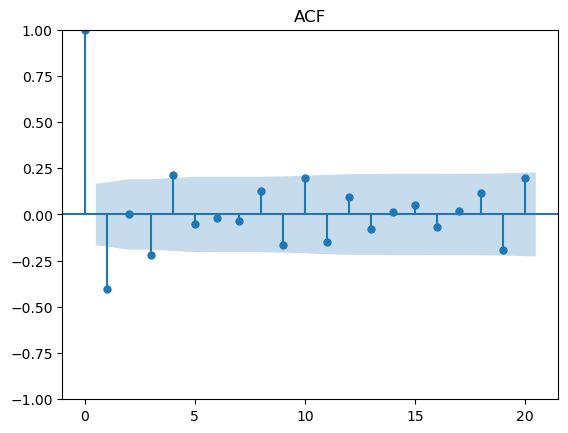

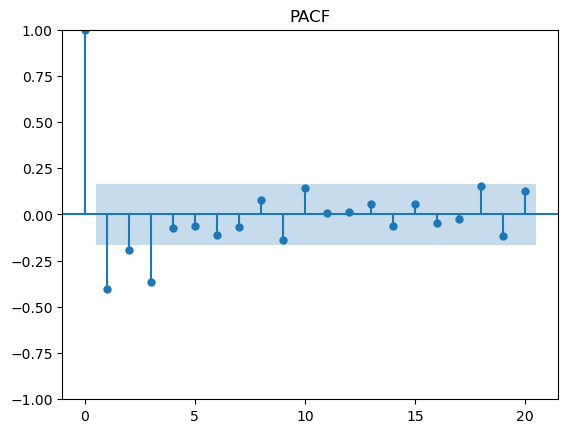

Mean:  Temperature    0.014929
dtype: float64
Variance:  Temperature    0.039834
dtype: float64
Standard deviation:  Temperature    0.199584
dtype: float64


In [31]:
# Feature Extraction
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF graphs to determine p,q values
plot_acf(series_diff, lags=20)
plt.title('ACF')
plt.savefig('plots/TempAnomaly_ACF.png')
plt.show()

plot_pacf(series_diff, lags=20)
plt.title('PACF')
plt.savefig('plots/TempAnomaly_PACF.png')
plt.show()

# Show data characteristics
print('Mean: ', series_diff.mean())
print('Variance: ', series_diff.var())
print('Standard deviation: ', series_diff.std())

In [53]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

#model = auto_arima(series_diff, d=1, seasonal=False, information_criterion='aic')
#model.summary()

model = ARIMA(series, order=(2, 1, 4)).fit()
model.summary()


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Temperature   No. Observations:                  141
Model:                 ARIMA(2, 1, 4)   Log Likelihood                  51.475
Date:                Wed, 22 May 2024   AIC                            -88.950
Time:                        01:34:38   BIC                            -68.358
Sample:                             0   HQIC                           -80.582
                                - 141                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4070      0.350     -1.163      0.245      -1.093       0.279
ar.L2         -0.3084      0.301     -1.025      0.305      -0.898       0.281
ma.L1         -0.1399      0.354     -0.396      0.692      -0.833       0.553
ma.L2          0.0235      0.229      0.102      0.918      -0.426       0.473
ma.L3         -0.3752      0.165     -2.275      0.023      -0.698      -0.052
ma.L4          0.2028      0.137      1.475      0.140      -0.067       0.472
sigma2         0.0279      0.003      8.030      0.000       0.021       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.62   Prob(JB):                         0.90
Heteroskedasticity (H):               2.15   Skew:                            -0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

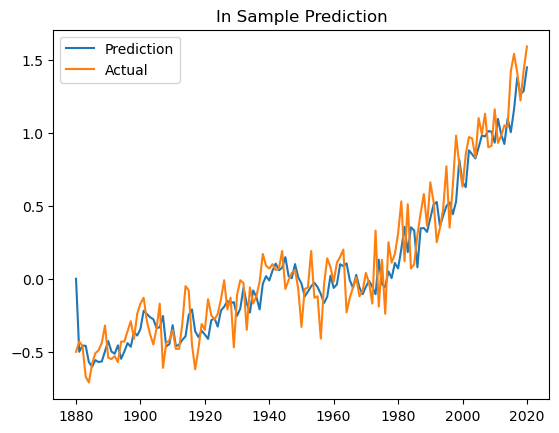

p-value:      lb_stat  lb_pvalue
1  0.258771   0.610966
Ljung-Box test: p value is > 0.05. Thus the data is random



In [55]:
# Prediction
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

prediction = model.predict(start=0, end = len(series)-1)
plt.figure()
plt.plot(prediction, label='Prediction')
plt.plot(series, label="Actual")
plt.legend()
plt.title("In Sample Prediction")
plt.savefig('plots/TempAnomaly_InSample_Prediction.png')
plt.show()

residuals = model.resid
# perform Ljung-Box test on residuals with lag=1 to check if random
result_lb = sm.stats.acorr_ljungbox(residuals, lags=[1], return_df=True)
print('p-value: ',result_lb)
print("Ljung-Box test: p value is > 0.05. Thus the data is random\n")



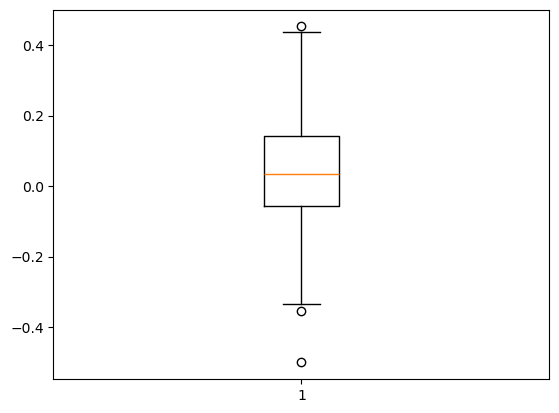

Outliers 
    Year         0
0  1880 -0.500000
1  1907 -0.355243
2  1998  0.452661


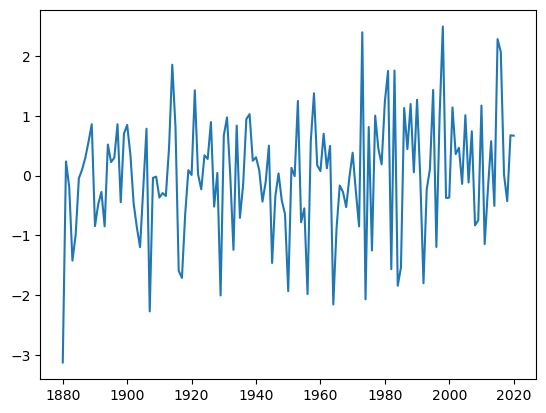

Zscores: 
 Year
1880   -3.129454
1881    0.237514
1882   -0.187970
1883   -1.424111
1884   -0.995843
          ...   
2016    2.072891
2017    0.016761
2018   -0.427329
2019    0.675561
2020    0.669051
Length: 141, dtype: float64
Anomalies: 
 Year
1880   -3.129454
1907   -2.274380
1929   -2.007329
1964   -2.157894
1973    2.400043
1974   -2.071308
1998    2.497875
2015    2.286010
2016    2.072891
dtype: float64
Index([1880, 1907, 1929, 1964, 1973, 1974, 1998, 2015, 2016], dtype='int64', name='Year')


IndexError: positional indexers are out-of-bounds

In [71]:
# Anomaly Detection

def box_plot_outlier(data):

    # Calculate quartiles and IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    iqr = q3 - q1

    # Find outliers using IQR method
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

def z_score(data):
    # Calculate Z-score for each data point
    return (data - np.mean(data)) / np.std(data)

#Box plot
plt.boxplot(residuals)
plt.show()

# Print Outliers
outliers = box_plot_outlier(residuals)
print("Outliers \n",residuals[residuals.isin(outliers)].reset_index())

# Plot zscores
zscore = z_score(residuals)
plt.plot(zscore)
plt.show()
print("Zscores: \n",zscore)

# Anomalies
anomalies = zscore[zscore.abs() > 2]    # 98% Anomaly Threshold
print("Anomalies: \n",anomalies)

print(anomalies.index)
print(series.iloc[anomalies.index])

# Plot anomalies on original series
series.plot(kind='line', title='Line plot', xlabel='Year', ylabel='Anomaly', label="Temperature")
plt.plot(anomalies.index, series.iloc[anomalies.index], style="o", label = "Anomalies")
plt.title(f'Anomalies in red (z-score > 98%)\nBoxplot outliers in green (1.5*IQR)')
plt.show()